# **Import Library dan Download Package**

In [ ]:
import json
import nltk
import random
import string
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import IPython.display as ipd 
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

In [ ]:
# Package sentence tokenizer
nltk.download('punkt') 
# Package lemmatization
nltk.download('wordnet')
# Package multilingual wordnet data
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Download Dataset dari Github**

In [ ]:
# Download budi.json
from urllib import request
url = "https://raw.githubusercontent.com/Finger15945/budi/main/budi.json"
request.urlretrieve(url, "budi.json")

('budi.json', <http.client.HTTPMessage at 0x7faa86dbaf90>)

# **Load Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load Dataset budi.json**

In [ ]:
dataset = open('/content/budi.json').read()
intents = json.loads(dataset)

In [ ]:
tags = [] # data tag
inputs = [] # data input atau pattern
responses = {} # data respon
words = [] # data kata 
classes = [] # data Kelas atau Tag
documents = [] # data Kalimat Dokumen
ignore_words = ['?','!'] # mengabaikan tanda spesial karakter

In [ ]:
for intent in intents['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])
    for pattern in intent['patterns']:
      w = nltk.word_tokenize(pattern)
      words.extend(w)
      documents.append((w, intent['tag']))
      if intent['tag'] not in classes:
        classes.append(intent['tag'])

In [ ]:
# Konversi data json ke dalam dataframe
data = pd.DataFrame({"patterns":inputs, "tags":tags})

In [ ]:
data

,patterns,tags
0,hallo,greetings
1,hai,greetings
2,halo,greetings
3,hei,greetings
4,hi,greetings
...,...,...
3087,Nama Senjata dari Maluku Utara?,senjata_maluku_utara
3088,Nama Senjata asal Maluku Utara?,senjata_maluku_utara
3089,Apa Senjata tradisional Maluku Utara?,senjata_maluku_utara
3090,Apa nama Senjata tradisional Maluku Utara?,senjata_maluku_utara


# **Tahap Data Preprocessing**

In [ ]:
# Menghilangkan Punktuasi
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [ ]:
# Proses Lematisasi
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

print (len(words), "Kata yang dilematisasi", words)

125 Kata yang dilematisasi ['aceh', 'adat', 'afternoon', 'alat', 'apa', 'asal', 'babel', 'bai', 'bali', 'bangka', 'banten', 'banyak', 'barat', 'belitung', 'bengkulu', 'berasal', 'bro', 'budi', 'bye', 'byee', 'dadah', 'daerah', 'dah', 'dari', 'di', 'diambil', 'dihasilkan', 'diy', 'dki', 'fungsi', 'good', 'gorontalo', 'hai', 'hallo', 'halo', 'hei', 'hi', 'hy', 'informasi', 'istimewa', 'itu', 'jabar', 'jakarta', 'jambi', 'jateng', 'jatim', 'jawa', 'jogja', 'jumpa', 'kalbar', 'kalimantan', 'kalsel', 'kaltara', 'kalteng', 'kaltim', 'kasih', 'kawan', 'kenal', 'kepri', 'kepualauan', 'kepulauan', 'kerajinan', 'khas', 'khast', 'lagu', 'lampung', 'makanan', 'makasih', 'malam', 'maluku', 'malut', 'mana', 'morning', 'musik', 'nama', 'ntb', 'ntt', 'nusa', 'oleh', 'pagi', 'pakaian', 'papua', 'pegunungan', 'provinsi', 'referensi', 'riau', 'riau/kepri', 'rumah', 'saja', 'salam', 'sampai', 'see', 'selamat', 'selatan', 'senjata', 'si', 'siang', 'sore', 'sulawesi', 'sulbar', 'sulsel', 'sulteng', 'sultra'

In [ ]:
# Mensort tag
classes = sorted(list(set(classes)))
print(len(classes), "Label", classes)

278 Label ['Pakaian_Daerah_Bali', 'Pakaian_Daerah_Bangka_Belitung', 'Pakaian_Daerah_Banten', 'Pakaian_Daerah_Bengkulu', 'Pakaian_Daerah_Gorontalo', 'Pakaian_Daerah_Jakarta', 'Pakaian_Daerah_Jambi', 'Pakaian_Daerah_Jawa_Barat', 'Pakaian_Daerah_Jawa_Tengah', 'Pakaian_Daerah_Jawa_Timur', 'Pakaian_Daerah_Kalimantan_Barat', 'Pakaian_Daerah_Kalimantan_Selatan', 'Pakaian_Daerah_Kalimantan_Tengah', 'Pakaian_Daerah_Kalimantan_Timur', 'Pakaian_Daerah_Kalimantan_Utara', 'Pakaian_Daerah_Kepulauan_Riau', 'Pakaian_Daerah_Lampung', 'Pakaian_Daerah_Maluku', 'Pakaian_Daerah_Maluku_Utara', 'Pakaian_Daerah_Nanggroe_Aceh_Darussalam', 'Pakaian_Daerah_Nusa_Tenggara_Barat', 'Pakaian_Daerah_Nusa_Tenggara_Timur', 'Pakaian_Daerah_Papua', 'Pakaian_Daerah_Papua_Barat', 'Pakaian_Daerah_Riau', 'Pakaian_Daerah_Sulawesi_Barat', 'Pakaian_Daerah_Sulawesi_Selatan', 'Pakaian_Daerah_Sulawesi_Tengah', 'Pakaian_Daerah_Sulawesi_Tenggara', 'Pakaian_Daerah_Sulawesi_Utara', 'Pakaian_Daerah_Sumatera_Barat', 'Pakaian_Daerah_Sumat

In [ ]:
# Melihat keseluruhan data teks
print (len(documents), "documents")

36458 documents


In [ ]:
# Tokenisasi data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
train

[[85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100, 101],
 [3, 102, 79],
 [103, 79],
 [104, 79],
 [5, 105, 106, 107, 44, 108],
 [26, 109],
 [110],
 [111],
 [80],
 [112],
 [113, 80],
 [114, 115],
 [116, 117],
 [118],
 [119, 81],
 [120],
 [121, 81],
 [82, 83],
 [122],
 [82, 83, 123],
 [3, 15, 5, 41],
 [3, 49, 15, 26, 41],
 [3, 1, 15, 6, 41],
 [3, 1, 15, 5, 9, 41],
 [3, 1, 15, 41],
 [15, 41],
 [15, 6, 41],
 [15, 9, 41],
 [15, 2, 41],
 [15, 26, 41],
 [15, 44, 50, 51, 41],
 [3, 15, 5, 24, 19],
 [3, 49, 15, 26, 24, 19],
 [3, 1, 15, 6, 24, 19],
 [3, 1, 15, 5, 9, 24, 19],
 [3, 1, 15, 24, 19],
 [15, 24, 19],
 [15, 6, 24, 19],
 [15, 9, 24, 19],
 [15, 2, 24, 19],
 [15, 26, 24, 19],
 [15, 44, 50, 51, 24, 19],
 [3, 15, 5, 24, 12],
 [3, 49, 15, 26, 24, 12],
 [3, 1, 15, 6, 24, 12],
 [3, 1, 15, 5, 9, 24, 12],
 [3, 1, 15, 24, 12],
 [15, 24, 12],
 [15, 6, 24, 12],
 [15, 9, 24, 12],
 [15, 2, 24, 12],
 [15, 26, 24, 12],
 [15, 44, 50, 51, 24, 12],

In [ ]:
# Menerapkan proses dari padding
x_train = pad_sequences(train)
print(x_train)

[[ 0  0  0 ...  0  0 85]
 [ 0  0  0 ...  0  0 86]
 [ 0  0  0 ...  0  0 87]
 ...
 [ 0  0  0 ...  7 30 19]
 [ 0  0  0 ...  7 30 19]
 [ 0  0  0 ...  7 30 19]]


In [ ]:
# Encoding output
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])
print(y_train) #Label Encodings

[102 102 102 ... 263 263 263]


In [ ]:
# input length
input_shape = x_train.shape[1]
print(input_shape)

10


In [ ]:
# Mendefine vocabulary
vocabulary = len(tokenizer.word_index)
print("Jumlah kata unik : ", vocabulary)

# output length
output_length = le.classes_.shape[0]
print("output length: ", output_length)

Jumlah kata unik :  125
output length:  278


# **Menyimpan model words dan labels**

In [ ]:
pickle.dump(words,open('/content/words.pkl','wb'))
pickle.dump(classes,open('/content/labels.pkl','wb'))

# **Menyimpan label Encoder dan Tokenizer**

In [ ]:
pickle.dump(le, open('/content/le.pkl','wb'))
pickle.dump(tokenizer, open('/content/tokenizers.pkl','wb'))

# ***Membuat Model Menggunakan Sequential Model***

In [ ]:
# Membuat training data:
training_data = []
# Membuat array kosong untuk output:
output = [0]*len(classes)
for doc in documents:
  bag_of_words = []
  pattern_words = doc[0]
  #Lematisasi pattern words:
  pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
  
  for w in words:
    if w in pattern_words:
      bag_of_words.append(1)
    else:
        bag_of_words.append(0)
    
  output_row = list(output)
  output_row[classes.index(doc[1])] = 1
  training_data.append([bag_of_words,output_row])

In [ ]:
# Mengconvert training_data ke dalam numpy array dan menshuffle datanya
random.shuffle(training_data)
training_data = np.array(training_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Membuat training list
x_train = list(training_data[:,0])
y_train = list(training_data[:,1])

In [ ]:
# Membangun Model:

model = Sequential()
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(len(y_train[0]), activation='softmax'))

In [ ]:
sgd_optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.7, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 128)               16128     
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                8256      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_44 (Dense)            (None, 278)               18070     
                                                                 
Total params: 42,454
Trainable params: 42,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model 
history = model.fit(np.array(x_train),
                    np.array(y_train),
                    epochs=100,
                    batch_size=5,
                    verbose=1)

Epoch 1/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.3895 - accuracy: 0.8779
Epoch 2/100
7292/7292 [==============================] - 16s 2ms/step - loss: 0.3107 - accuracy: 0.9005
Epoch 3/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.2763 - accuracy: 0.9116
Epoch 4/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.2440 - accuracy: 0.9200
Epoch 5/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.2222 - accuracy: 0.9273
Epoch 6/100
7292/7292 [==============================] - 16s 2ms/step - loss: 0.1987 - accuracy: 0.9360
Epoch 7/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.1961 - accuracy: 0.9367
Epoch 8/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.1846 - accuracy: 0.9396
Epoch 9/100
7292/7292 [==============================] - 14s 2ms/step - loss: 0.1741 - accuracy: 0.9431
Epoch 10/100
7292/7292 [==============================] - 16s 2m

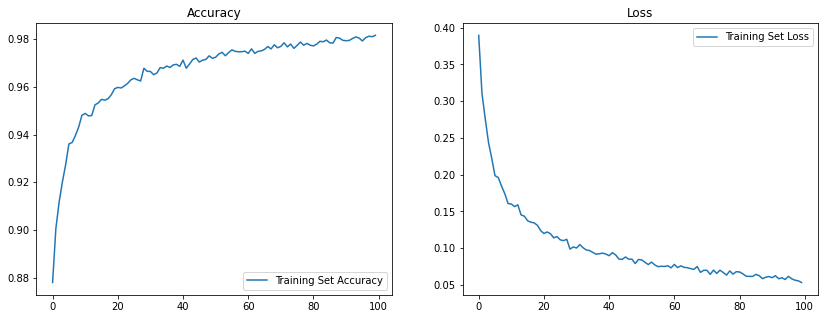

In [ ]:
# Visualisasi Plot Hasil Akurasi dan Loss
# Plot Akurasi
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],label='Training Set Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label='Training Set Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
model.save('model_budi.h5', history)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pickle
import numpy as np
import json
import random
from keras.models import load_model

model = load_model('/content/model_budi.h5')

intents = json.loads(open('budi.json').read())
words = pickle.load(open('words.pkl','rb'))
labels = pickle.load(open('labels.pkl','rb'))

In [ ]:
def bank_of_words(s,words, show_details=True):
    bag_of_words = [0 for _ in range(len(words))]
    sent_words = nltk.word_tokenize(s)
    sent_words = [lemmatizer.lemmatize(word.lower()) for word in sent_words]
    for sent in sent_words:
        for i,w in enumerate(words):
            if w == sent:
                bag_of_words[i] = 1
    return np.array(bag_of_words)

def predict_label(s, model):
    # Filtering prediksi
    pred = bank_of_words(s, words,show_details=False)
    response = model.predict(np.array([pred]))[0]
    ERROR_THRESHOLD = 0.25
    final_results = [[i,r] for i,r in enumerate(response) if r>ERROR_THRESHOLD]
    final_results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in final_results:
        return_list.append({"intent": labels[r[0]], "probability": str(r[1])})
    return return_list

In [ ]:
def Response(ints, intents_json):
    tags = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tags):
            response = random.choice(i['responses'])
            break
    return response

def chatbot_response(msg):
    ints = predict_label(msg, model)
    response = Response(ints, intents)
    return response

In [ ]:
def chat():
    print("Haii, Selamat datang di chatbot budi! Mari bertanya")
    while True:
        inp = input("You: ")
        response = chatbot_response(inp)
        print("\n Budi : " + response + '\n\n')
        if inp.lower() == 'Dah' or 'Bye' or 'Byee' or 'Dadaah' or 'Good bye' or 'Selamat Tinggal' or 'Sampai Jumpa' or 'See You':
          break
chat()

Haii, Selamat datang di chatbot budi! Mari bertanya
You: hello
1/1 [==============================] - 0s 19ms/step

 Budi : Hai! Salam Kenal aku Budi.


